In [245]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [246]:
import tensorflow as tf
from tensorflow import keras

In [247]:
keras.__version__

'2.6.0'

In [248]:
fashion_mnist =  keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [249]:
X_train_full.dtype

dtype('uint8')

In [250]:
X_train_full.shape

(60000, 28, 28)

In [251]:
#validation세트 만들고 경사하강법을 위해 255로 나눠줌(0~1)

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]
X_test = X_test/255.0

In [252]:
class_names = ["T-shirt/top", "Trouser", "Pullover","Dress","Coat","Sandal","Shirt","Sneaker","bas","Ankle boot"]

In [253]:
class_names[y_train[0]]

'Coat'

### 아래의 Flatten layer는 28 * 28행렬을 784배열로 바꿔줌

In [254]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [255]:
### 위와 동일

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [256]:
from keras.layers import Dense
output_layer = Dense(10)

In [257]:
output_layer

In [258]:
from tensorflow.keras.layers import Dense
output_layer = Dense(10)

In [259]:
output_layer

In [260]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_100 (Dense)            (None, 300)               235500    
_________________________________________________________________
dense_101 (Dense)            (None, 100)               30100     
_________________________________________________________________
dense_102 (Dense)            (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [261]:
model.layers

In [262]:
hidden1 = model.layers[1]
hidden1.name

'dense_100'

In [263]:
#model.get_layer("dense_50") is hidden1

In [264]:
weights, biases = hidden1.get_weights()

In [265]:
weights

array([[ 0.03430481,  0.03111666,  0.03266805, ...,  0.07217963,
        -0.04139739, -0.05624133],
       [ 0.05008132, -0.04670797, -0.06294327, ...,  0.03384572,
        -0.00118987,  0.04630516],
       [ 0.00952945, -0.06355996,  0.0634062 , ..., -0.05710402,
         0.00706516, -0.00173104],
       ...,
       [-0.05568278, -0.03198855,  0.03209315, ...,  0.03526172,
         0.00531055,  0.01105143],
       [-0.04420037, -0.04881051,  0.00212193, ..., -0.07146792,
         0.03765113, -0.04503657],
       [-0.050597  , -0.01802538,  0.04425964, ..., -0.04492099,
         0.06759524,  0.02381784]], dtype=float32)

In [266]:
### 첫번쨰 층인 784입력층에 300개 은닝층에 대한 가중치이므로 784 * 300

weights.shape

(784, 300)

In [267]:
###Flatten층은 데이터 변환만 해주므로 편향이 없음

biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [268]:
biases.shape

(300,)

## optimizer는 가중치 학습방법 (SGD , adam?)등등
## loss는 트레이닝시 사용하는 손실함수(rmse, acc)등등
## optimizer는 훈련이 아니라 성능평가시에만 사용됨->loss와 동일한 함수 사용가능

In [269]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [270]:
### validation_data에 Valid셋을 넣는것 보다는 0.1같은 비율을 넣어 나눠주는게 더 편함

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7337 - accuracy: 0.7629 - val_loss: 0.5159 - val_accuracy: 0.8300
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4916 - accuracy: 0.8298 - val_loss: 0.5172 - val_accuracy: 0.8048
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4440 - accuracy: 0.8439 - val_loss: 0.4248 - val_accuracy: 0.8490
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4175 - accuracy: 0.8540 - val_loss: 0.4305 - val_accuracy: 0.8476
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3966 - accuracy: 0.8602 - val_loss: 0.3867 - val_accuracy: 0.8668
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3813 - accuracy: 0.8662 - val_loss: 0.4087 - val_accuracy: 0.8606
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3681 - accuracy: 0.8697 - val_loss: 0.3916 - val_accuracy:

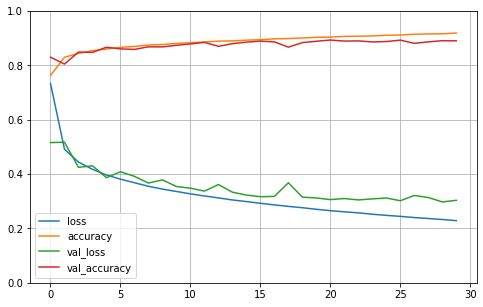

In [271]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [273]:
history.history["loss"]

[0.7336652278900146,
 0.49155616760253906,
 0.44401898980140686,
 0.4175492823123932,
 0.39663270115852356,
 0.3812853991985321,
 0.3681219220161438,
 0.3550805449485779,
 0.34473347663879395,
 0.3359863758087158,
 0.32722845673561096,
 0.3193829655647278,
 0.3123675286769867,
 0.3047771453857422,
 0.2988883852958679,
 0.2924855947494507,
 0.286615788936615,
 0.2811134159564972,
 0.2762516438961029,
 0.2704092860221863,
 0.26541000604629517,
 0.2610498368740082,
 0.25734618306159973,
 0.2523401379585266,
 0.24808382987976074,
 0.24445800483226776,
 0.24001438915729523,
 0.2364559769630432,
 0.23288163542747498,
 0.22866509854793549]

In [274]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 795us/step - loss: 0.3340 - accuracy: 0.8818


[0.33400774002075195, 0.8817999958992004]

In [275]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 0.97, 0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [279]:
### model.predict_classes함수와 같음

y_proba.argmax(axis=1)

array([9, 2, 1], dtype=int64)

In [280]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [290]:
###   input_shape매개변수 형태에 chk'
###    과대적합을 막기위해 은닉층과 뉴런수를 줄임

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
model.save("my_keras.h5")

Epoch 1/20
363/363 [==============================] - 0s 756us/step - loss: 0.8165 - val_loss: 0.5883
Epoch 2/20
363/363 [==============================] - 0s 581us/step - loss: 0.5790 - val_loss: 0.6481
Epoch 3/20
363/363 [==============================] - 0s 631us/step - loss: 0.9668 - val_loss: 0.5523
Epoch 4/20
363/363 [==============================] - 0s 558us/step - loss: 0.5316 - val_loss: 0.6550
Epoch 5/20
363/363 [==============================] - 0s 550us/step - loss: 0.6780 - val_loss: 0.5346
Epoch 6/20
363/363 [==============================] - 0s 545us/step - loss: 0.6618 - val_loss: 0.4375
Epoch 7/20
363/363 [==============================] - 0s 556us/step - loss: 0.4258 - val_loss: 0.4026
Epoch 8/20
363/363 [==============================] - 0s 561us/step - loss: 0.4031 - val_loss: 0.4017
Epoch 9/20
363/363 [==============================] - 0s 558us/step - loss: 0.3999 - val_loss: 0.3910
Epoch 10/20
363/363 [==============================] - 0s 558us/step - loss: 0.391

In [291]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs = [output])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
  1/363 [..............................] - ETA: 56s - loss: 8.6022

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


363/363 [==============================] - 0s 813us/step - loss: 1.9345 - val_loss: 0.7557
Epoch 2/20
363/363 [==============================] - 0s 583us/step - loss: 0.7181 - val_loss: 0.6223
Epoch 3/20
363/363 [==============================] - 0s 599us/step - loss: 0.6262 - val_loss: 0.5770
Epoch 4/20
363/363 [==============================] - 0s 626us/step - loss: 0.5866 - val_loss: 0.5460
Epoch 5/20
363/363 [==============================] - 0s 588us/step - loss: 0.5568 - val_loss: 0.5213
Epoch 6/20
363/363 [==============================] - 0s 581us/step - loss: 0.5360 - val_loss: 0.5030
Epoch 7/20
363/363 [==============================] - 0s 578us/step - loss: 0.5174 - val_loss: 0.4911
Epoch 8/20
363/363 [==============================] - 0s 581us/step - loss: 0.5047 - val_loss: 0.4784
Epoch 9/20
363/363 [==============================] - 0s 580us/step - loss: 0.4943 - val_loss: 0.4712
Epoch 10/20
363/363 [==============================] - 0s 582us/step - loss: 0.4861 - val_los

In [292]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs = [output])

In [293]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                   validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 0s 835us/step - loss: 1.8782 - val_loss: 0.8329
Epoch 2/20
363/363 [==============================] - 0s 613us/step - loss: 0.7816 - val_loss: 0.7267
Epoch 3/20
363/363 [==============================] - 0s 631us/step - loss: 0.7029 - val_loss: 0.6695
Epoch 4/20
363/363 [==============================] - 0s 648us/step - loss: 0.6569 - val_loss: 0.6300
Epoch 5/20
363/363 [==============================] - 0s 658us/step - loss: 0.6221 - val_loss: 0.5986
Epoch 6/20
363/363 [==============================] - 0s 622us/step - loss: 0.5934 - val_loss: 0.5713
Epoch 7/20
363/363 [==============================] - 0s 658us/step - loss: 0.5699 - val_loss: 0.5497
Epoch 8/20
363/363 [==============================] - 0s 628us/step - loss: 0.5519 - val_loss: 0.5327
Epoch 9/20
363/363 [==============================] - 0s 636us/step - loss: 0.5378 - val_loss: 0.5221
Epoch 10/20
363/363 [==============================] - 0s 623us/step - loss: 0.527

In [302]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                   validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 0s 836us/step - loss: 0.3562 - val_loss: 0.3488
Epoch 2/20
363/363 [==============================] - 0s 731us/step - loss: 0.3538 - val_loss: 0.3486
Epoch 3/20
363/363 [==============================] - 0s 604us/step - loss: 0.3534 - val_loss: 0.3476
Epoch 4/20
363/363 [==============================] - 0s 693us/step - loss: 0.3526 - val_loss: 0.3475
Epoch 5/20
363/363 [==============================] - 0s 642us/step - loss: 0.3518 - val_loss: 0.3476
Epoch 6/20
363/363 [==============================] - 0s 631us/step - loss: 0.3513 - val_loss: 0.3468
Epoch 7/20
363/363 [==============================] - 0s 608us/step - loss: 0.3511 - val_loss: 0.3456
Epoch 8/20
363/363 [==============================] - 0s 689us/step - loss: 0.3508 - val_loss: 0.3451
Epoch 9/20
363/363 [==============================] - 0s 791us/step - loss: 0.3501 - val_loss: 0.3462
Epoch 10/20
363/363 [==============================] - 0s 701us/step - loss: 0.349

In [318]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [319]:
###손실 mse로 전달가능하며 이때 두 출력에 모두 적용됨

model.compile(loss=["mse", "mse"], loss_weights = [0.9, 0.1], optimizer="sgd")

In [320]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.3567 - main_output_loss: 1.2306 - aux_output_loss: 2.4919 - val_loss: 0.7193 - val_main_output_loss: 0.6650 - val_aux_output_loss: 1.2085
Epoch 2/20
363/363 [==============================] - 0s 885us/step - loss: 0.6959 - main_output_loss: 0.6443 - aux_output_loss: 1.1609 - val_loss: 0.6404 - val_main_output_loss: 0.5983 - val_aux_output_loss: 1.0189
Epoch 3/20
363/363 [==============================] - 0s 925us/step - loss: 0.6022 - main_output_loss: 0.5603 - aux_output_loss: 0.9800 - val_loss: 0.7408 - val_main_output_loss: 0.7143 - val_aux_output_loss: 0.9798
Epoch 4/20
363/363 [==============================] - 0s 872us/step - loss: 0.7012 - main_output_loss: 0.6725 - aux_output_loss: 0.9588 - val_loss: 0.5008 - val_main_output_loss: 0.4660 - val_aux_output_loss: 0.8138
Epoch 5/20
363/363 [==============================] - 0s 884us/step - loss: 0.5040 - main_output_loss: 0.4715 - aux_output_loss: 0.7966 - 

In [321]:
total_loss ,main_loss, aux_loss = model.evaluate(
[X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 596us/step - loss: 0.3591 - main_output_loss: 0.3436 - aux_output_loss: 0.4989


In [322]:
y_pred_main, y_pre_aux = model.predict([X_new_A, X_new_B])

In [332]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu",**kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers,Dense(1)
        self.aux_output = keras.layers,Dense(1)        
        
        def call(self, inputs):
            input_A, input_B = inputs
            hidden1 = self.hidden1(input_B)
            hidden2 = self.hidden2(hidden1)
            concat = keras.layers.concatenate([input_A, hidden2])
            main_output = self.main_output(concat)
            aux_output = self.aux_output(hidden2)
            return main_output, aux_output
model = WideAndDeepModel()

In [225]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs = [output])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
363/363 [==============================] - 0s 493us/step - loss: 0.6642
Epoch 2/10
363/363 [==============================] - 0s 464us/step - loss: 0.4565
Epoch 3/10
363/363 [==============================] - 0s 441us/step - loss: 0.4310
Epoch 4/10
363/363 [==============================] - 0s 437us/step - loss: 0.3884
Epoch 5/10
363/363 [==============================] - 0s 446us/step - loss: 0.3734
Epoch 6/10
363/363 [==============================] - 0s 441us/step - loss: 0.3686
Epoch 7/10
363/363 [==============================] - 0s 486us/step - loss: 0.3656
Epoch 8/10
363/363 [==============================] - 0s 436us/step - loss: 0.3586
Epoch 9/10
363/363 [==============================] - 0s 440us/step - loss: 0.3552
Epoch 10/10
363/363 [==============================] - 0s 464us/step - loss: 0.3504


In [226]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10)
model.save("my_keras.h5")

Epoch 1/10
363/363 [==============================] - 0s 482us/step - loss: 1.6009
Epoch 2/10
363/363 [==============================] - 0s 438us/step - loss: 0.7321
Epoch 3/10
363/363 [==============================] - 0s 430us/step - loss: 0.6050
Epoch 4/10
363/363 [==============================] - 0s 435us/step - loss: 0.5538
Epoch 5/10
363/363 [==============================] - 0s 424us/step - loss: 0.5248
Epoch 6/10
363/363 [==============================] - 0s 460us/step - loss: 0.5047
Epoch 7/10
363/363 [==============================] - 0s 434us/step - loss: 0.4894
Epoch 8/10
363/363 [==============================] - 0s 435us/step - loss: 0.4774
Epoch 9/10
363/363 [==============================] - 0s 439us/step - loss: 0.4666
Epoch 10/10
363/363 [==============================] - 0s 444us/step - loss: 0.4580


In [227]:
checkpoint = keras.callbacks.ModelCheckpoint("my_keras.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint])

Epoch 1/10
363/363 [==============================] - 0s 452us/step - loss: 0.4503
Epoch 2/10
363/363 [==============================] - 0s 452us/step - loss: 0.4434
Epoch 3/10
363/363 [==============================] - 0s 441us/step - loss: 0.4374
Epoch 4/10
363/363 [==============================] - 0s 455us/step - loss: 0.4320
Epoch 5/10
363/363 [==============================] - 0s 452us/step - loss: 0.4272
Epoch 6/10
363/363 [==============================] - 0s 472us/step - loss: 0.4227
Epoch 7/10
363/363 [==============================] - 0s 450us/step - loss: 0.4185
Epoch 8/10
363/363 [==============================] - 0s 488us/step - loss: 0.4149
Epoch 9/10
363/363 [==============================] - 0s 467us/step - loss: 0.4112
Epoch 10/10
363/363 [==============================] - 0s 447us/step - loss: 0.4083
